In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pyreadstat
import missingno as msno
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn import metrics

In [35]:
df, meta = pyreadstat.read_dta("HCMST_ver_3.04.dta", encoding="ISO-8859-1")
print("Shape of the data= ", df.shape)

Shape of the data=  (4002, 387)


In [37]:
df.to_csv("HCMST_ver_3.04.csv", index=False)

In [38]:
df_features = df[['ppagecat', 'ppagect4', 'ppeducat', 'ppethm', 'ppgender', 'ppincimp', 'ppmsacat', 'ppreg4', 'ppreg9', 'ppt01', 'ppt1317', 'ppt18ov', 'ppt25', 'ppt612', 'children_in_hh', 'ppq14arace', 'papreligion', 'qflag', 'glbstatus', 'papglb_status', 's1', 's1a', 's2', 'q14', 'q17a', 'q17b', 'gender_attraction', 'q18a_1', 'q18a_2', 'q18a_3', 'q31_1', 'q31_2', 'q31_3', 'q31_4', 'q31_5', 'q31_6', 'q31_7', 'q31_8', 'q31_9', 'q31_other_text_entered', 'q32', 'q33_1', 'q33_2', 'q33_3', 'q33_4', 'q33_5', 'q33_6', 'q33_7', 'q33_other_text_entered', 'q34', 'q24_met_online', 'how_met_online', 'either_internet', 'same_sex_couple', 'how_long_ago_first_met', 'how_long_ago_first_romantic', 'how_long_ago_first_cohab', 'how_long_ago_first_met_cat', 'how_long_relationship', 'age_difference', 'met_through_friends', 'met_through_family', 'met_through_as_neighbors', 'met_through_as_coworkers', 'married', 'relationship_quality', 'q4', 'q5', 'q7b', 'q9', 'q10', 'q11']] 
df_features.shape

(4002, 72)

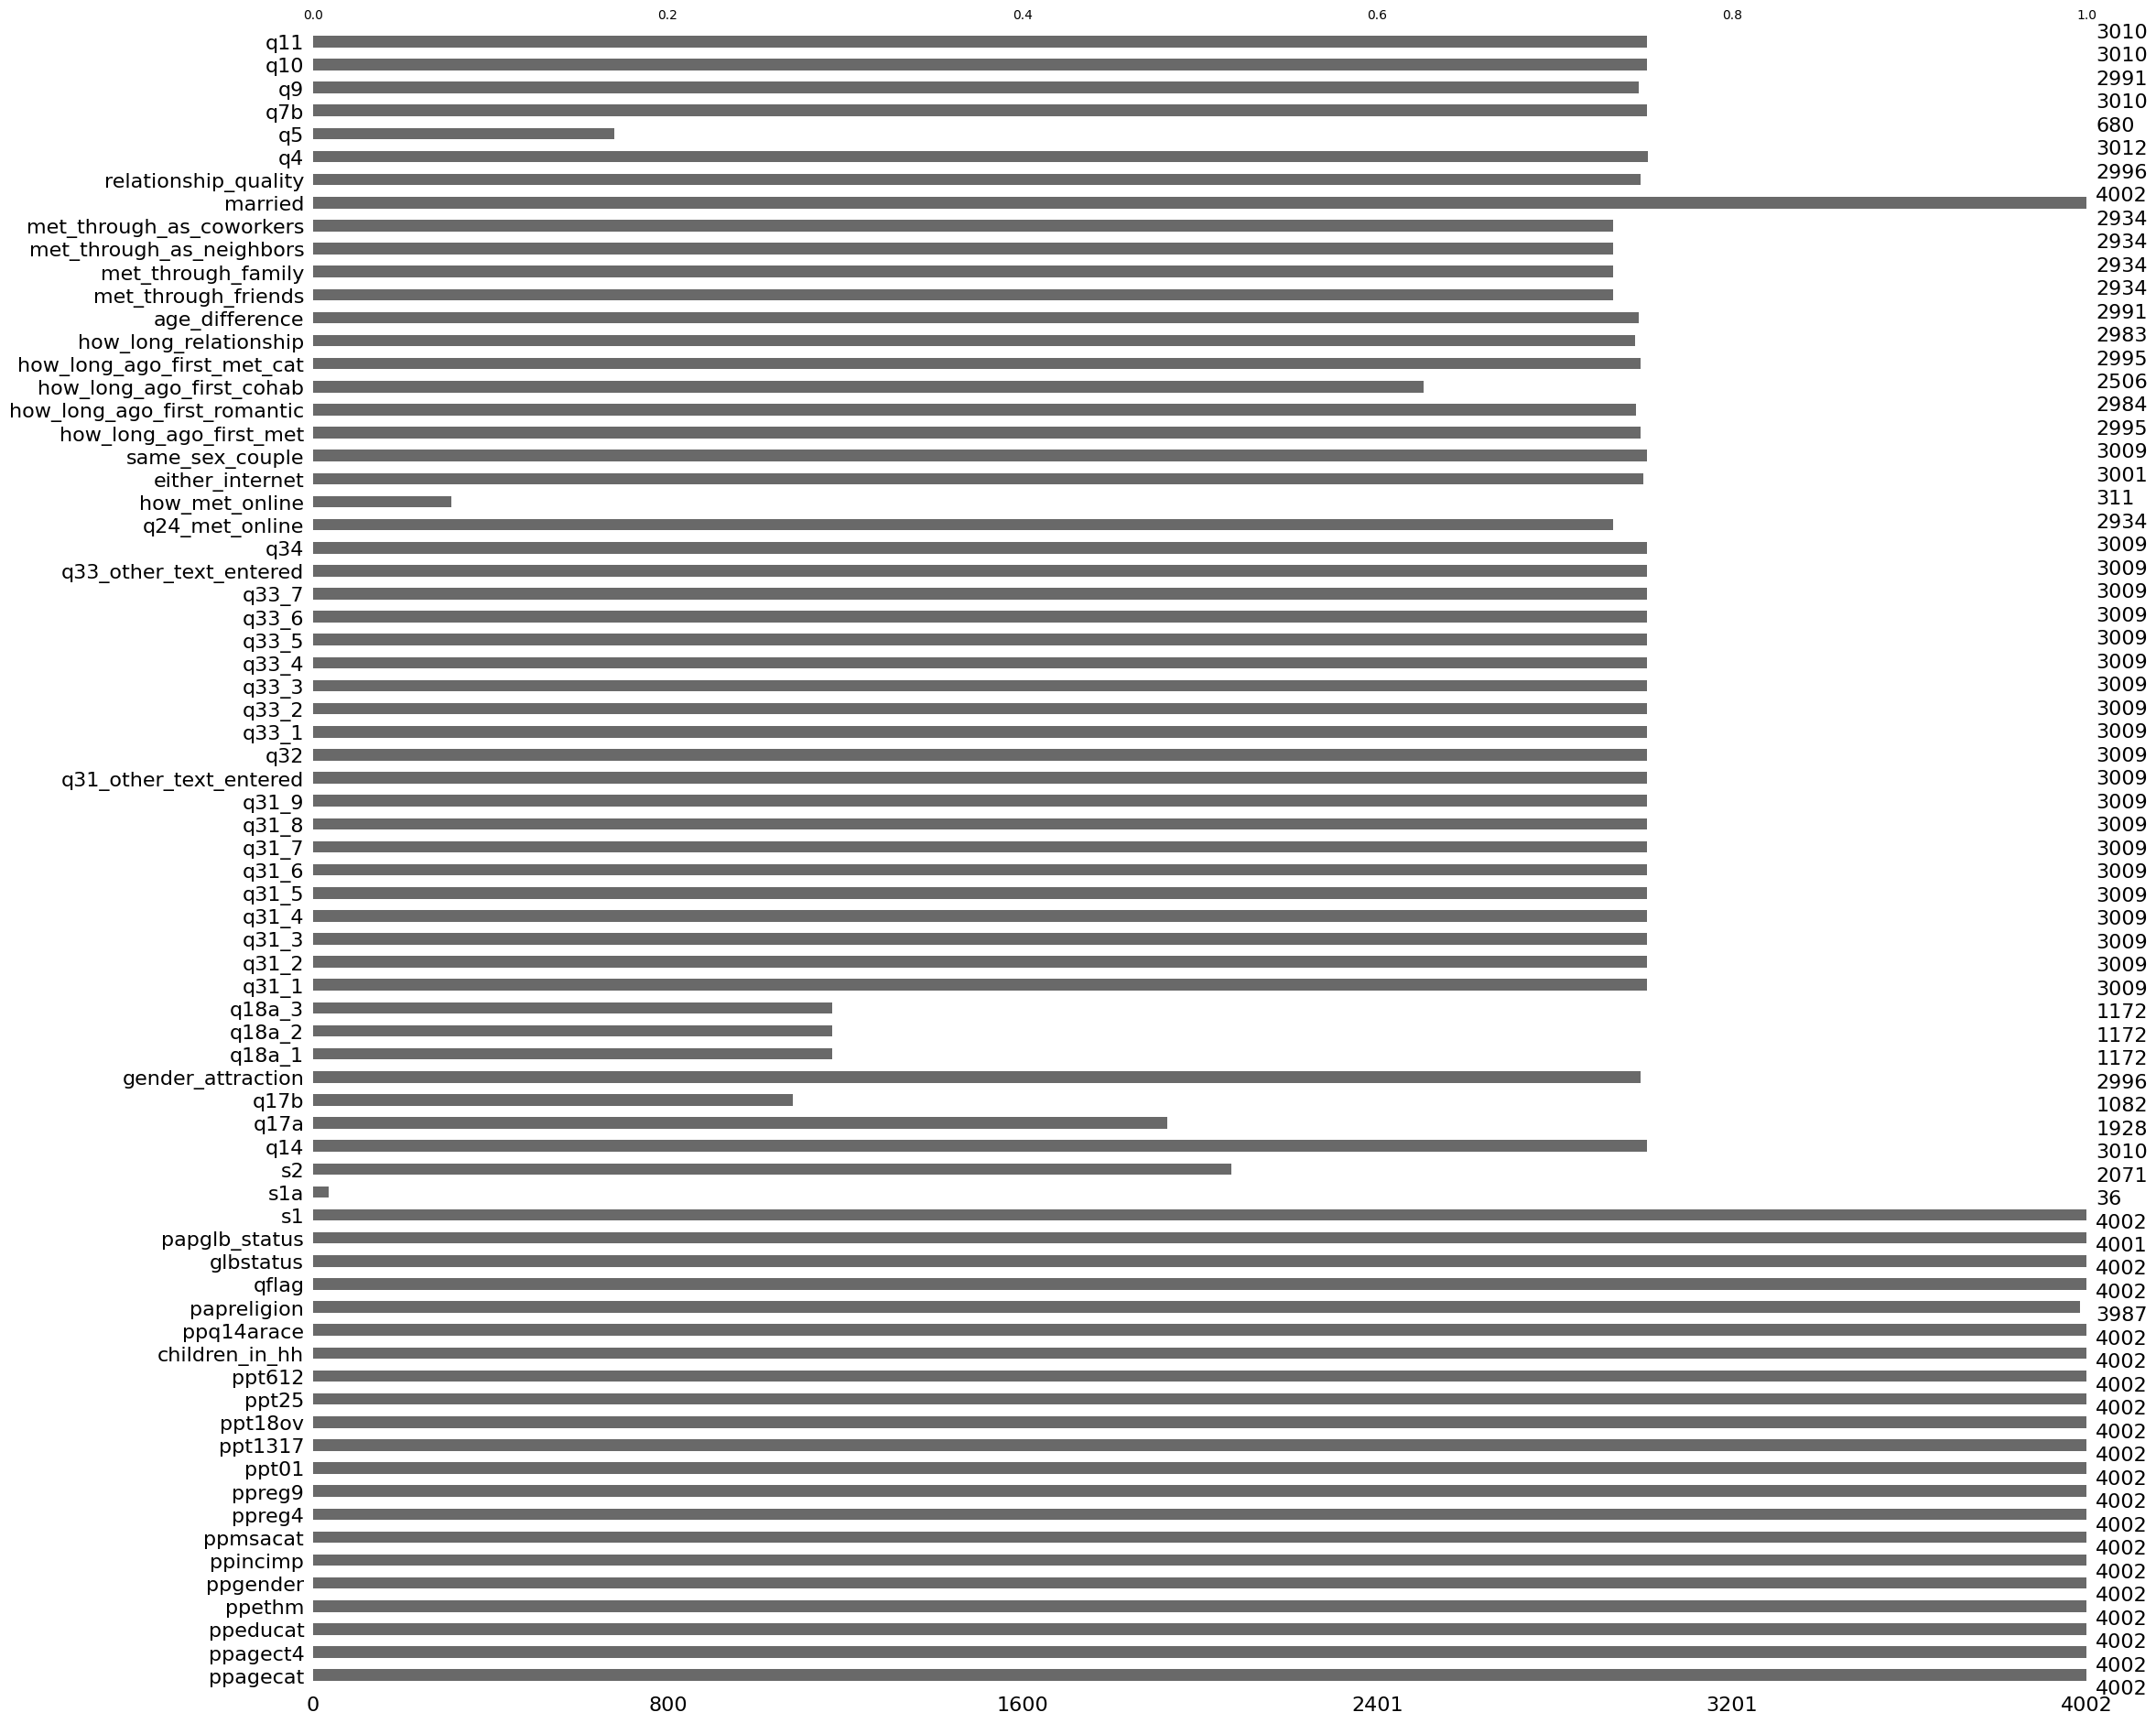

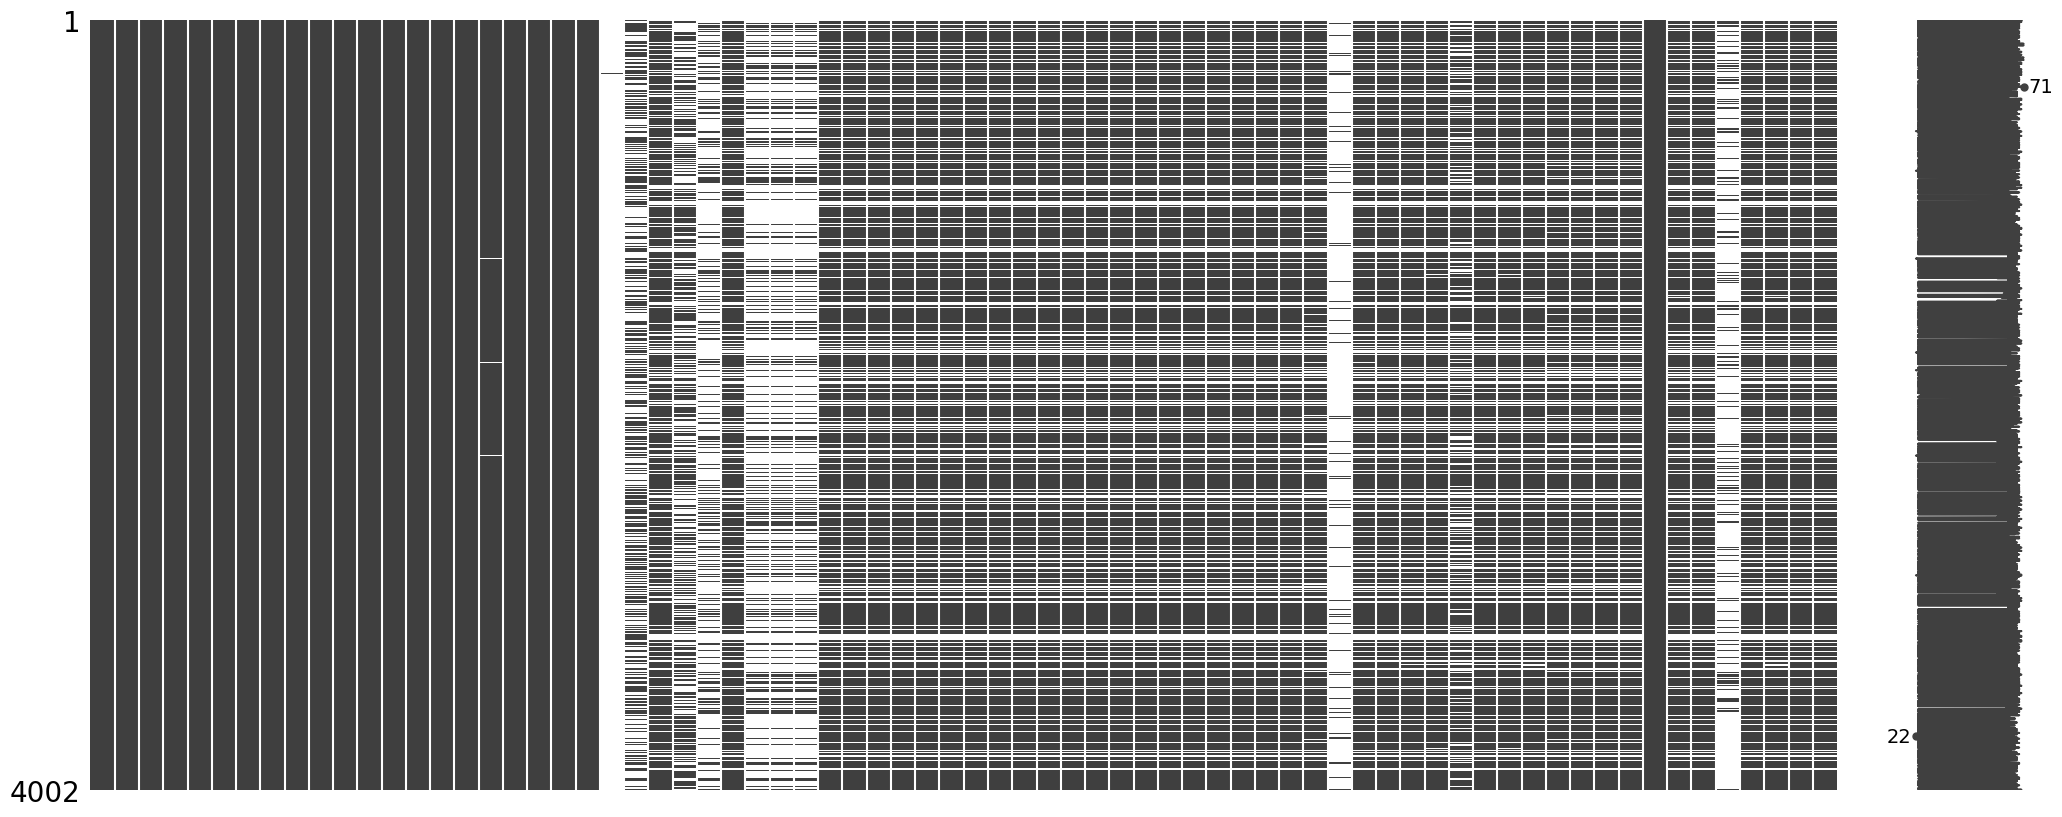

In [39]:
# Visualize missing values
msno.bar(df_features)  # Bar chart
plt.show()

msno.matrix(df_features)  # Matrix chart
plt.show()

#msno.heatmap(df_features)  # Correlation heatmap of missing values
#plt.show()

In [40]:
df_features_selected = df[['ppagecat', 'ppagect4', 'ppeducat', 'ppethm', 'ppgender', 'ppincimp', 'ppmsacat', 'ppreg4', 'ppreg9', 'ppt01', 'ppt1317', 'ppt18ov', 'ppt25', 'ppt612', 'children_in_hh', 'ppq14arace', 'qflag', 'glbstatus', 'papglb_status', 's1', 'married', 'q24_met_online']] 
df_features_selected.shape

(4002, 22)

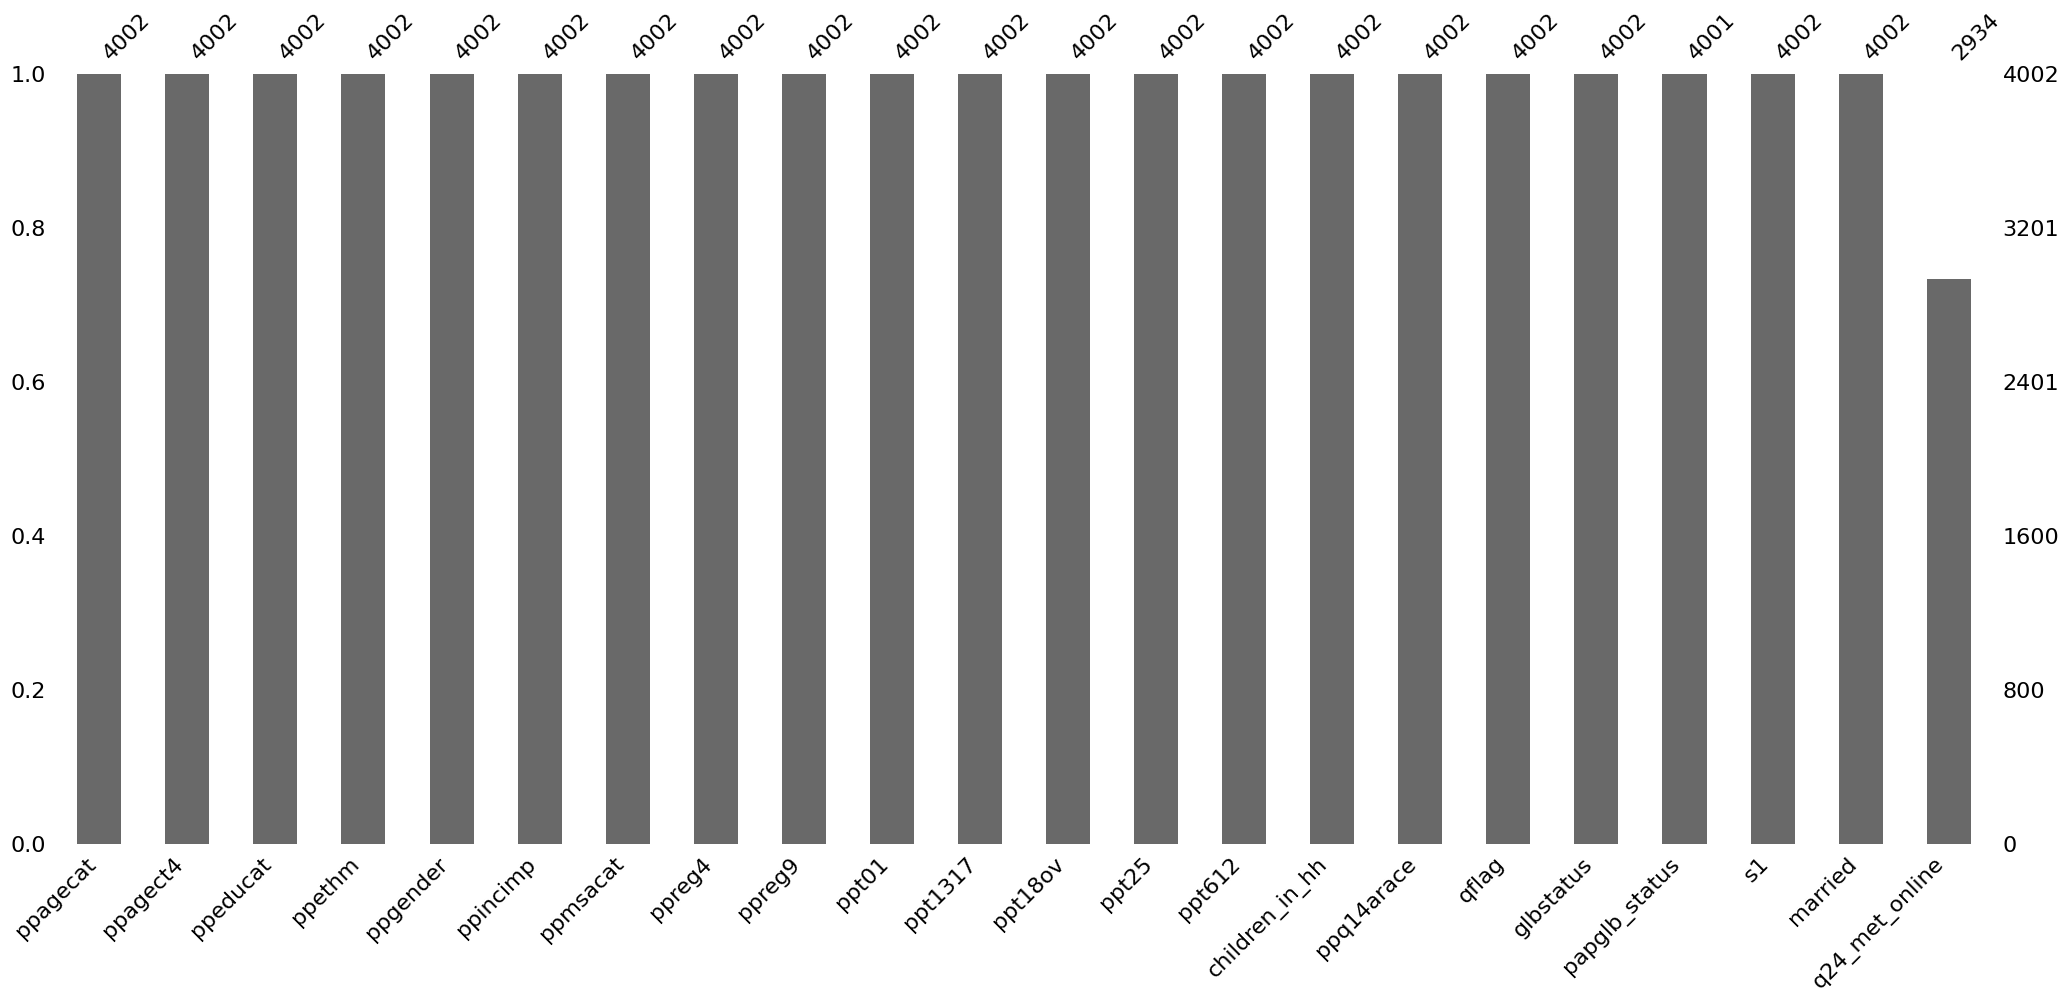

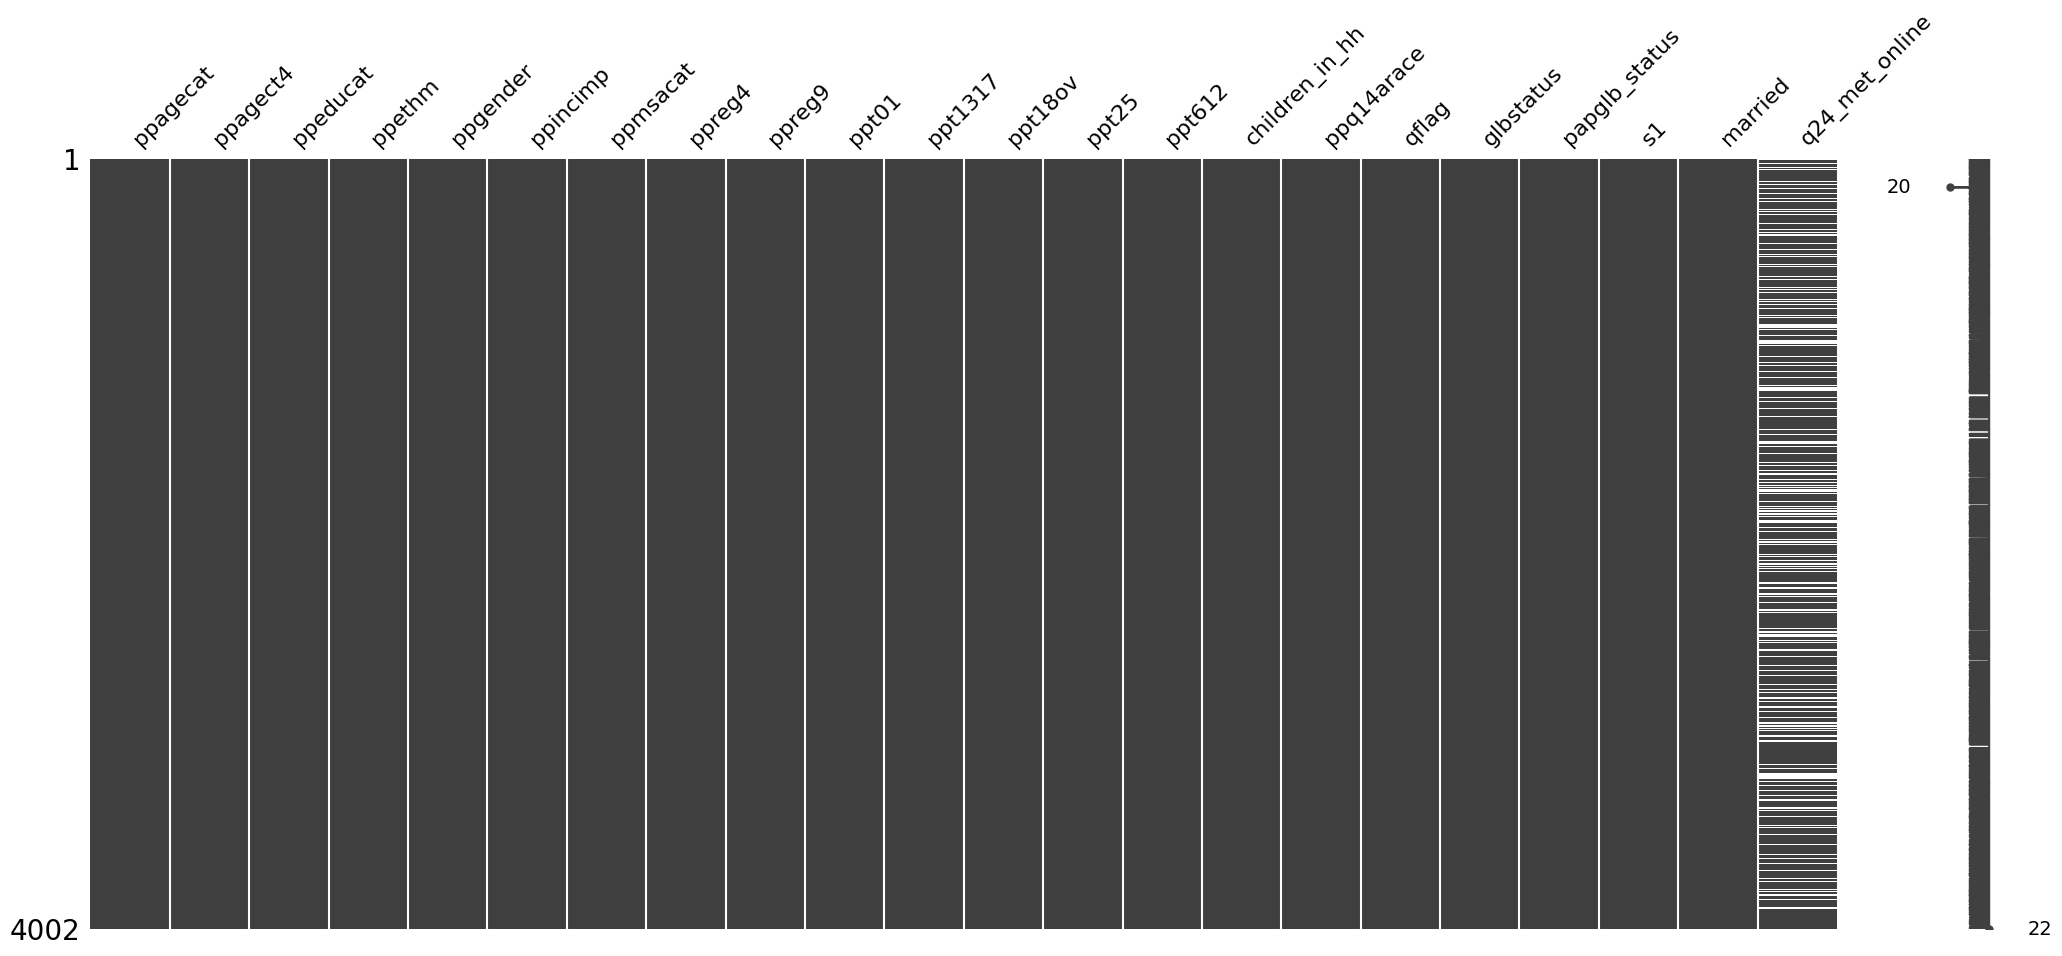

In [41]:
# Visualize missing values
msno.bar(df_features_selected)  # Bar chart
plt.show()

msno.matrix(df_features_selected)  # Matrix chart
plt.show()

#msno.heatmap(df_features_selected)  # Correlation heatmap of missing values
#plt.show()

In [42]:
df_features_selected = df_features_selected.dropna()
df_features_selected.shape

(2934, 22)

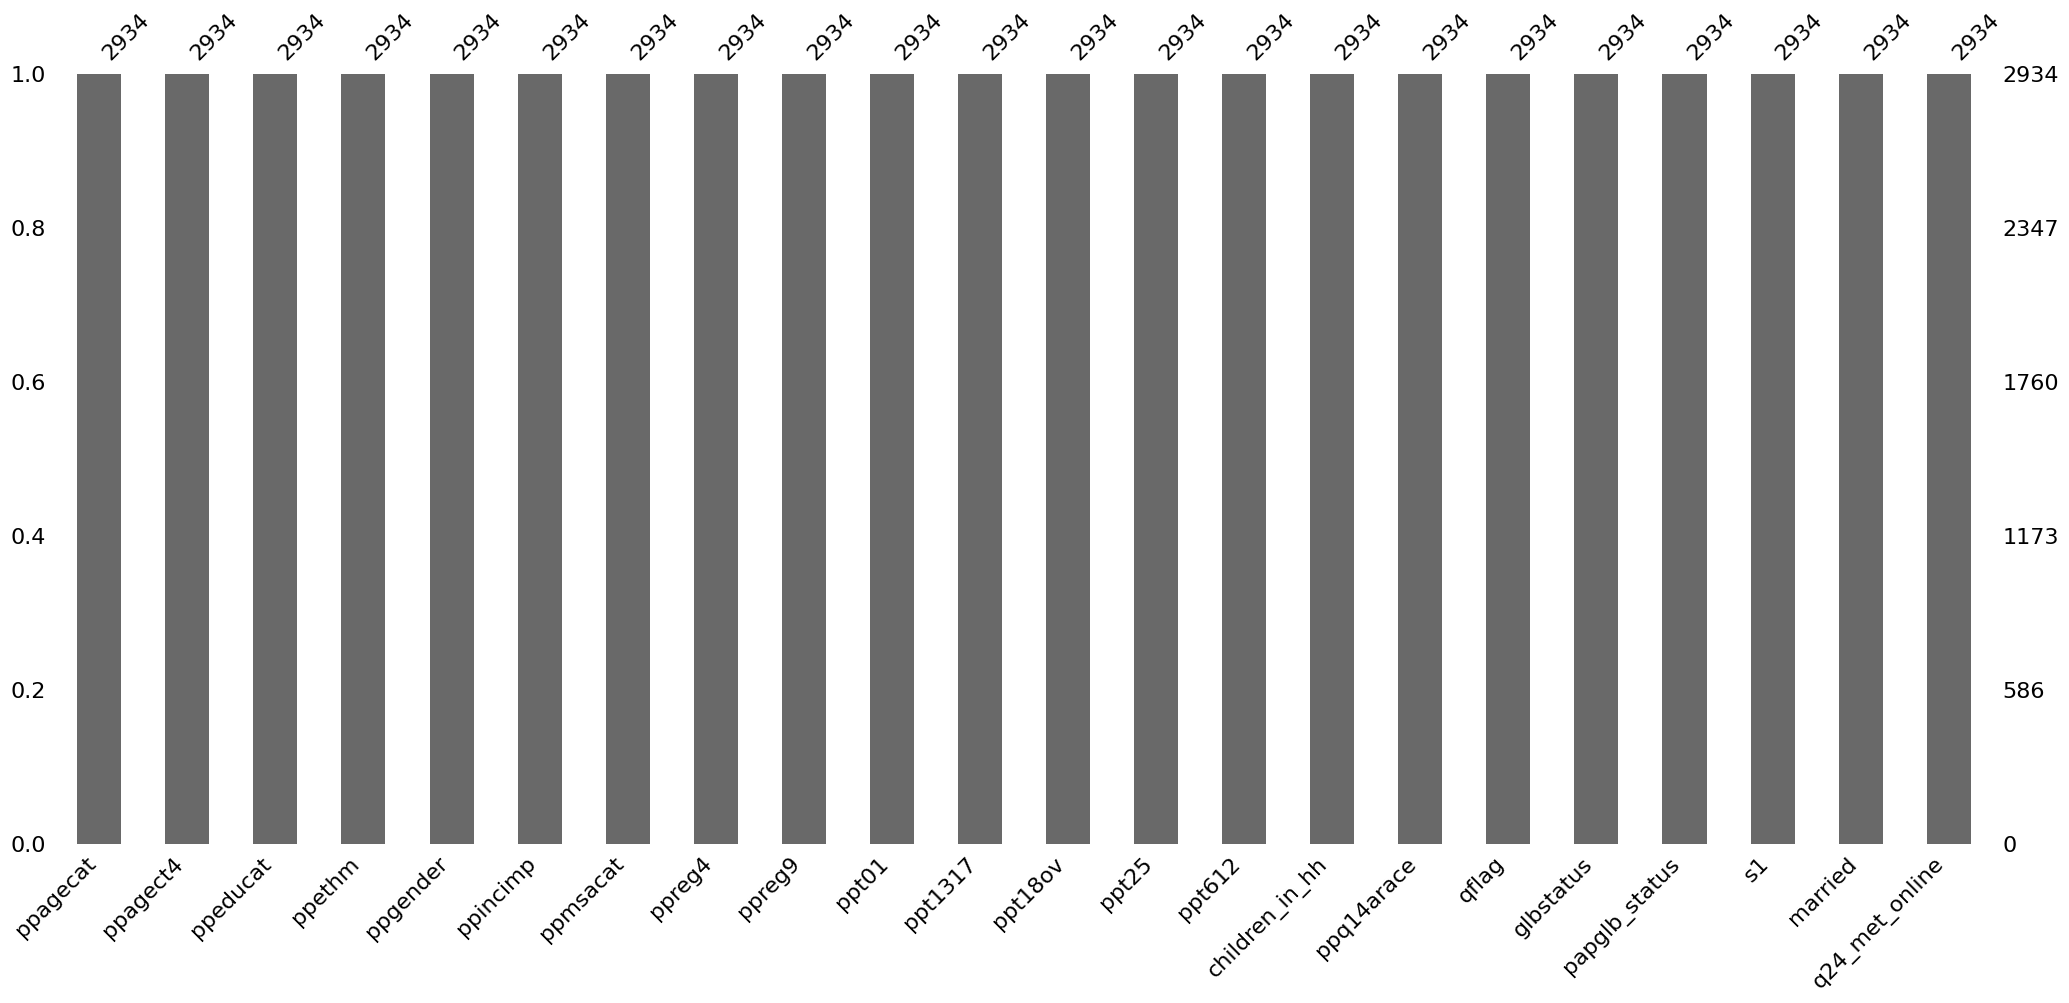

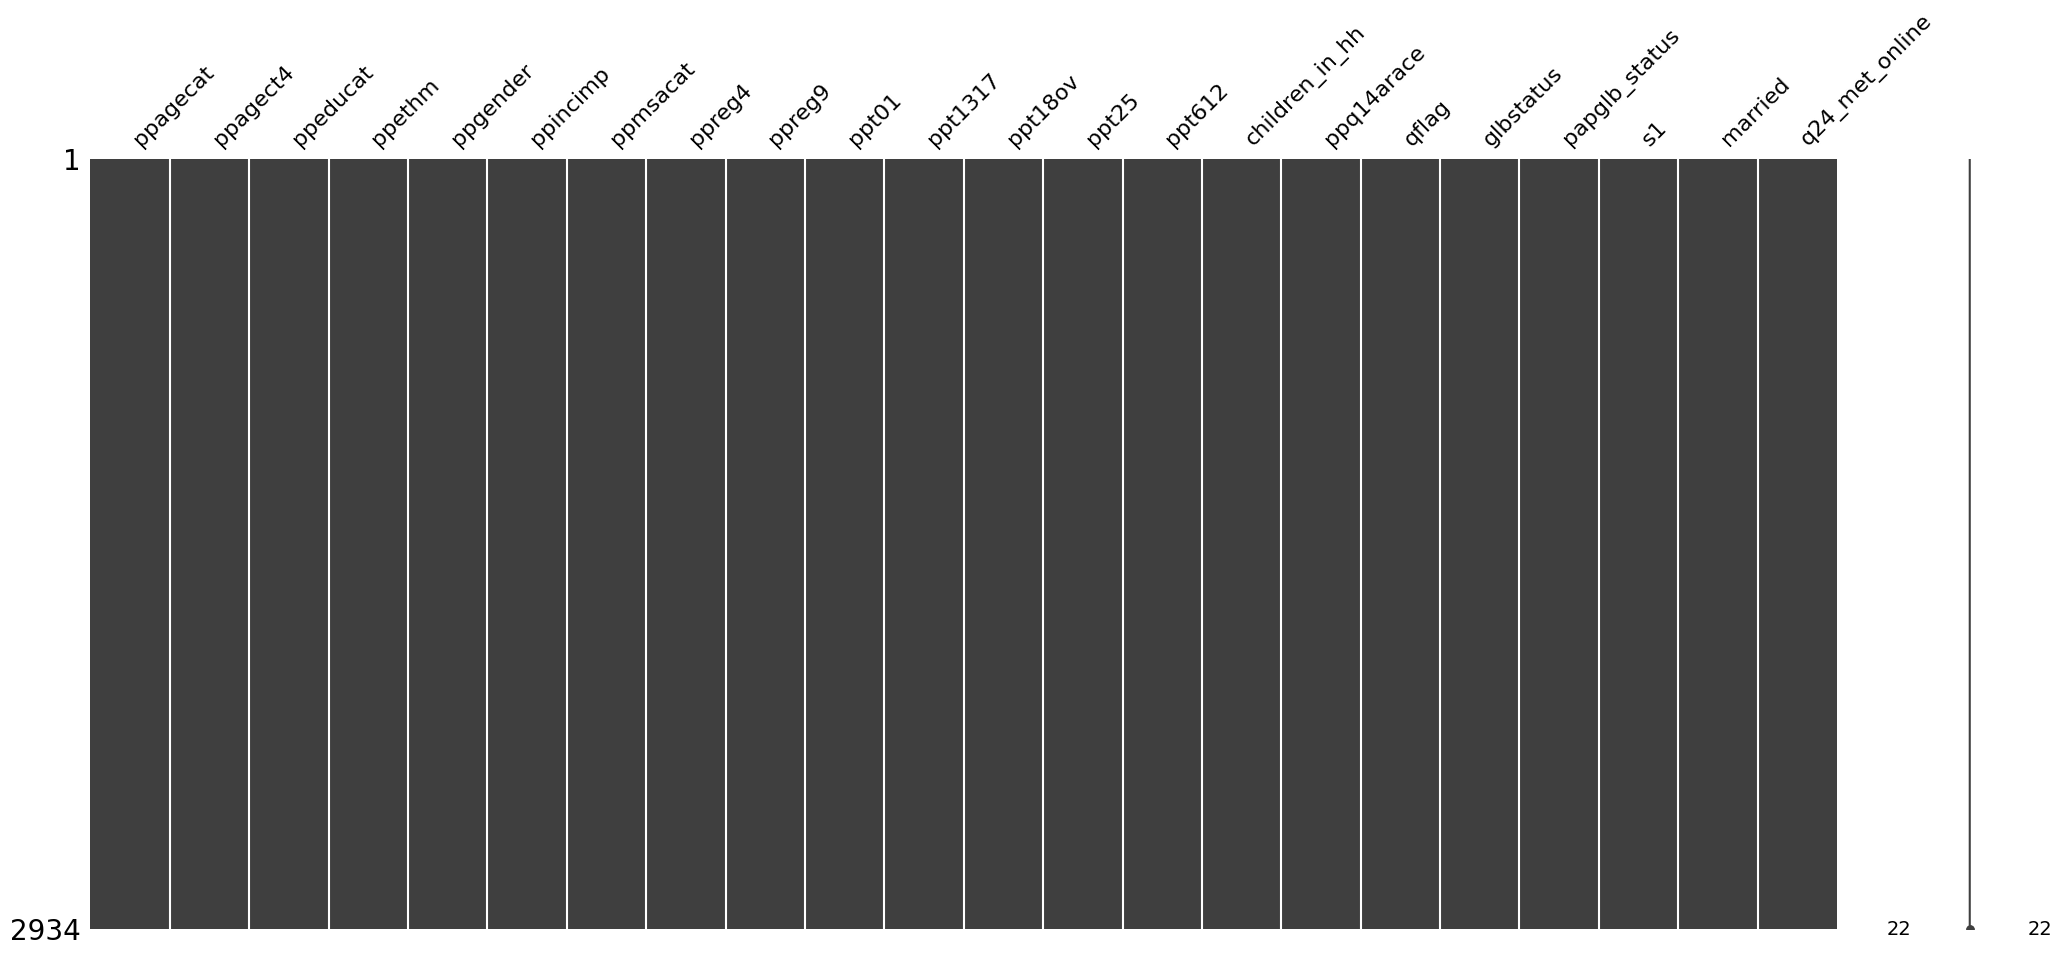

In [43]:
# Visualize missing values
msno.bar(df_features_selected)  # Bar chart
plt.show()

msno.matrix(df_features_selected)  # Matrix chart
plt.show()

In [44]:
df_features_selected["q24_met_online"] = pd.to_numeric(df_features_selected["q24_met_online"], errors="coerce")  # Convert to numbers, non-convertible values become NaN
df_features_selected["papglb_status"] = pd.to_numeric(df_features_selected["papglb_status"], errors="coerce") 
df_features_selected.dtypes

ppagecat          int64
ppagect4          int64
ppeducat          int64
ppethm            int64
ppgender          int64
ppincimp          int64
ppmsacat          int64
ppreg4            int64
ppreg9            int64
ppt01             int64
ppt1317           int64
ppt18ov           int64
ppt25             int64
ppt612            int64
children_in_hh    int64
ppq14arace        int64
qflag             int64
glbstatus         int64
papglb_status     int64
s1                int64
married           int64
q24_met_online    int64
dtype: object

Text(0.5, 1.0, 'Features distribution')

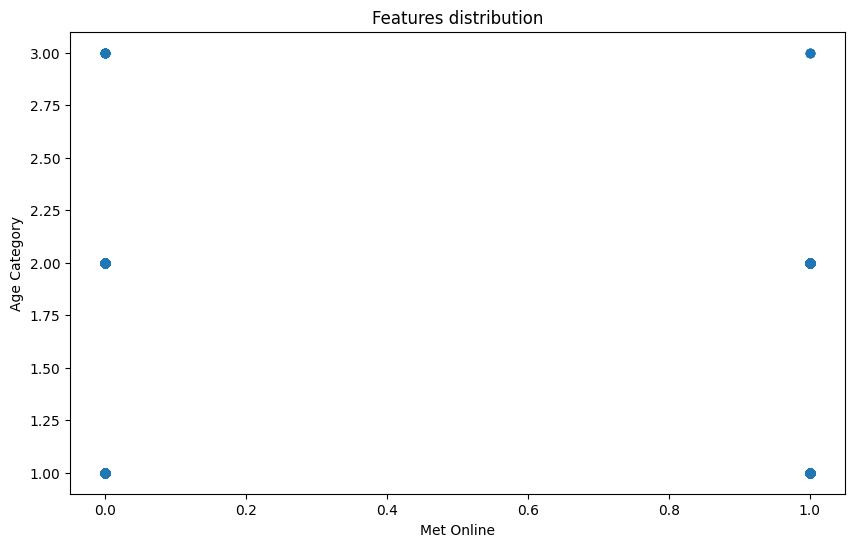

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(df_features_selected['q24_met_online'],df_features_selected['papglb_status'])
plt.xlabel('Met Online')
plt.ylabel('Age Category')
plt.title('Features distribution')

In [46]:
df_features_selected2 = df_features_selected[['ppagecat', 'ppeducat', 'ppgender', 'ppincimp', 'children_in_hh', 'qflag', 'glbstatus', 's1', 'married', 'q24_met_online']] 

c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

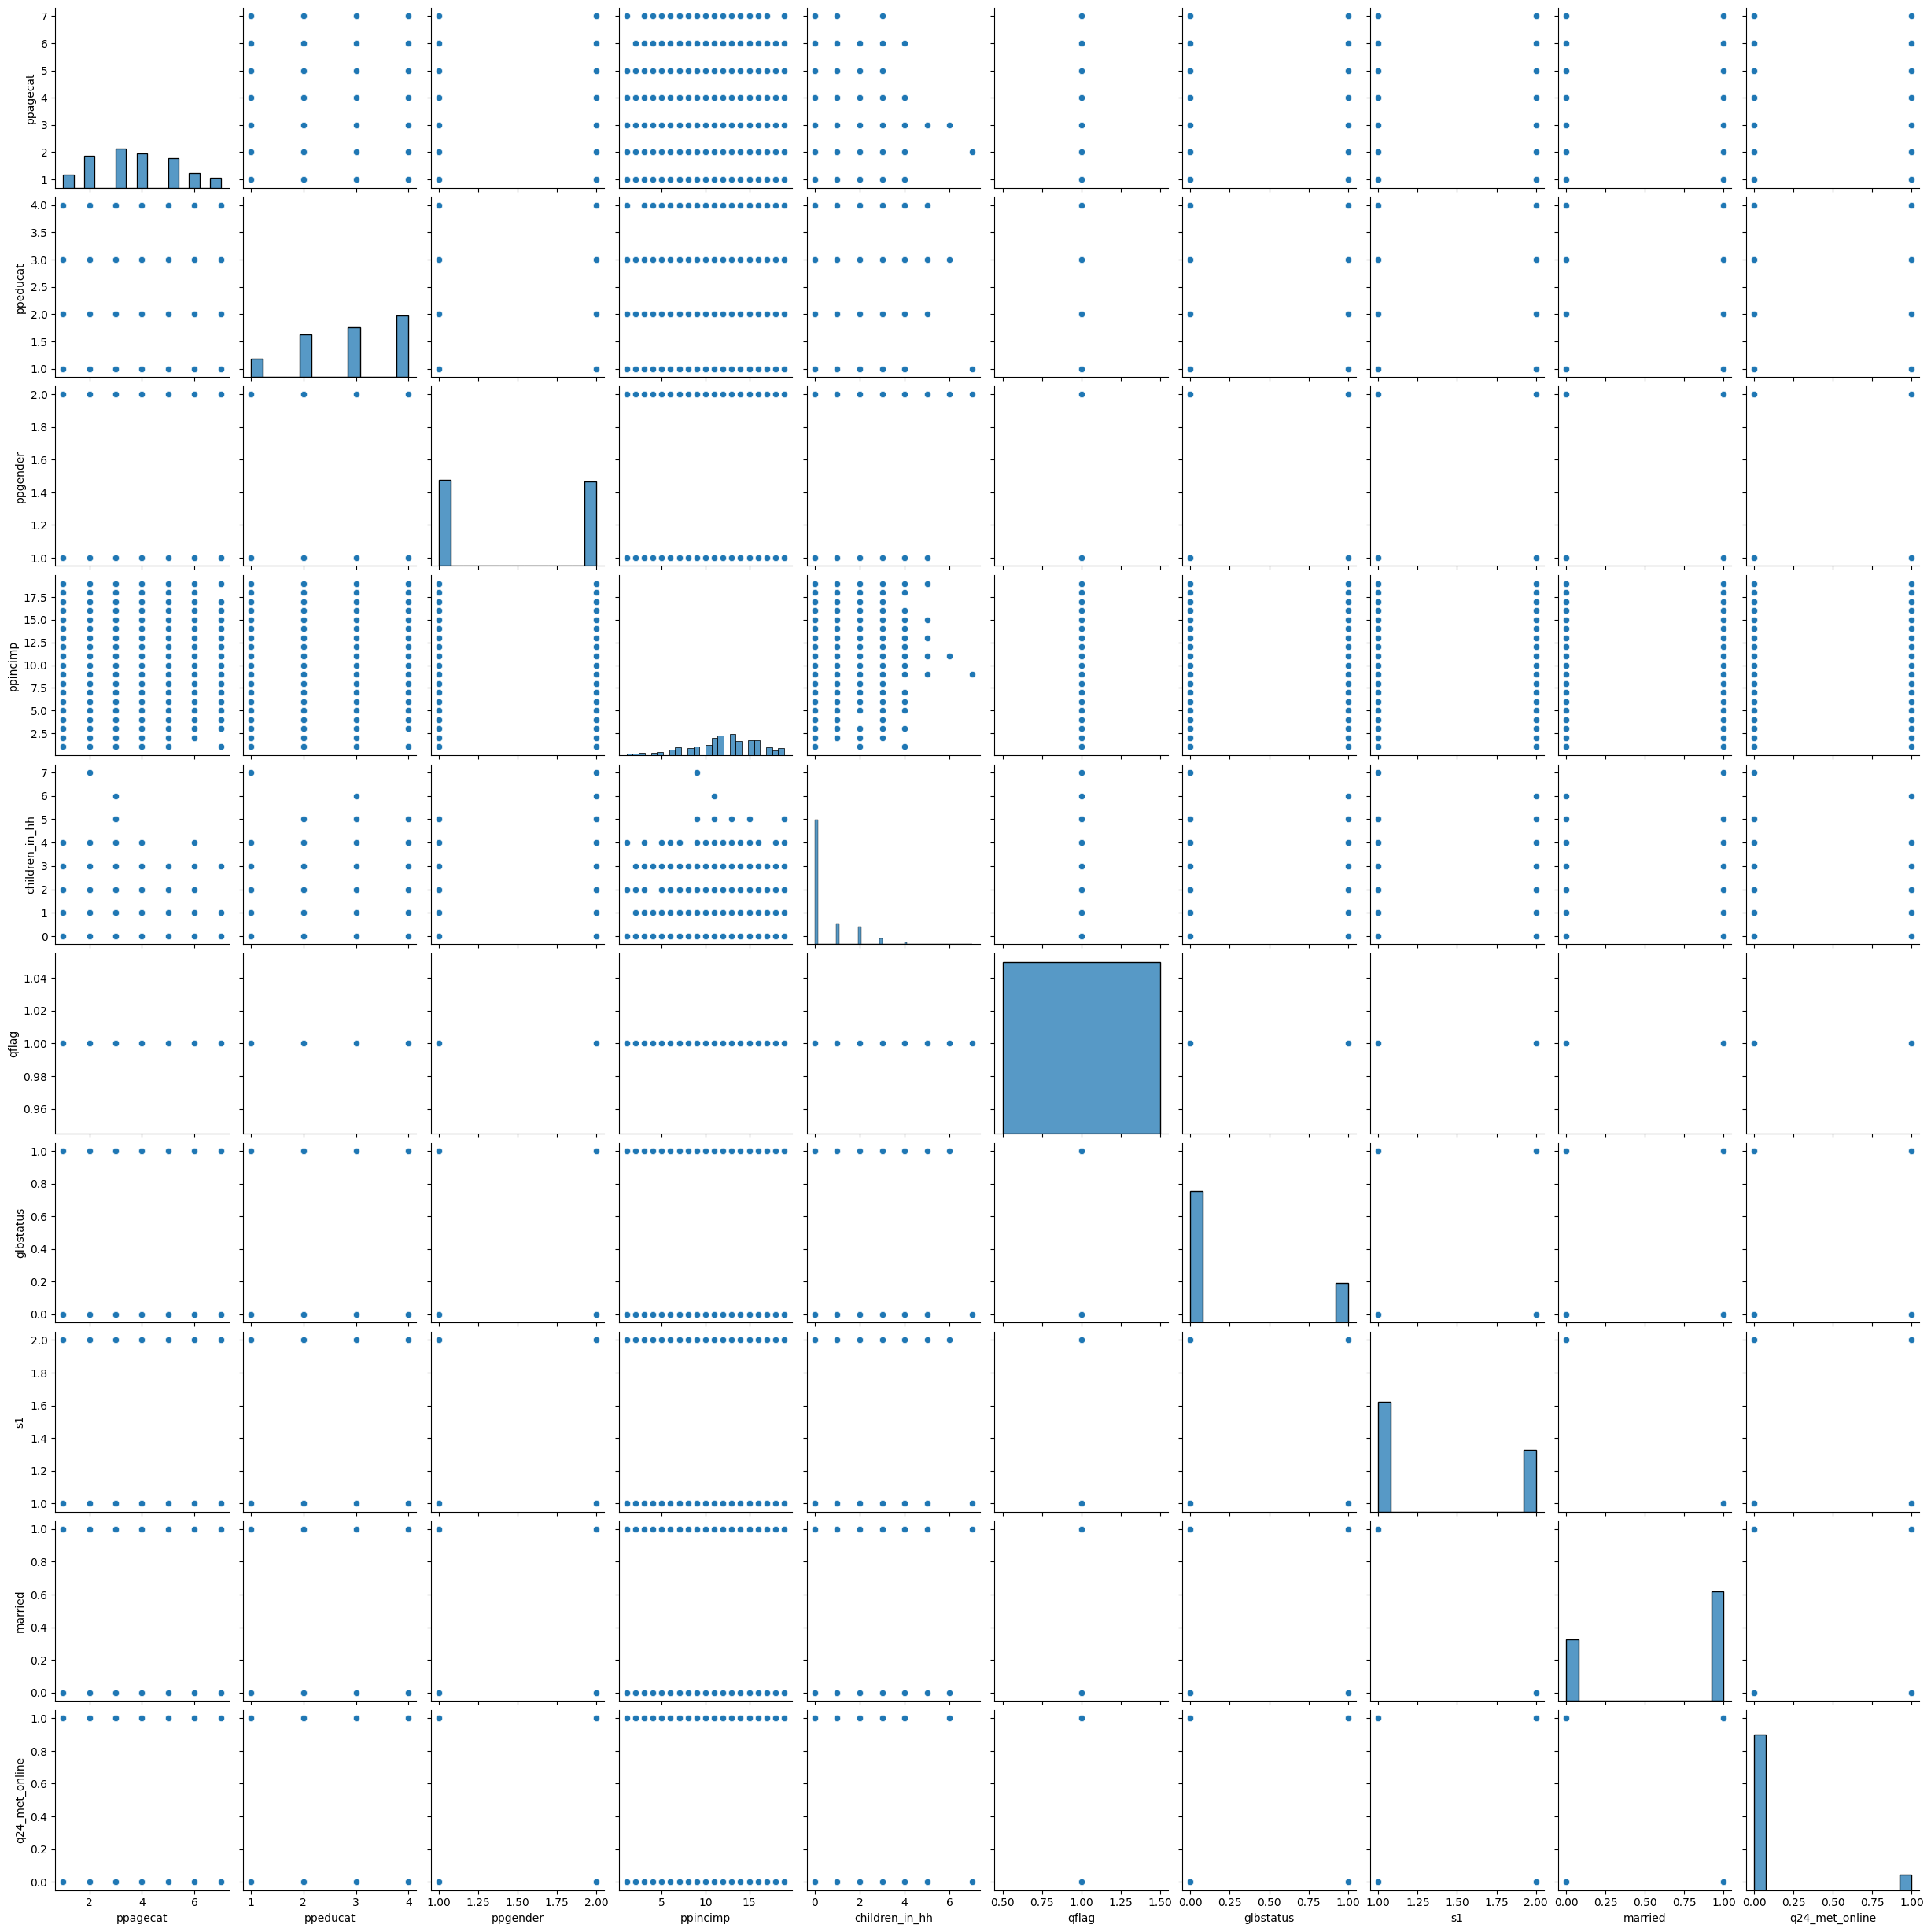

In [47]:
sns.pairplot(df_features_selected2, palette= "tab10", diag_kind='hist')


<Axes: xlabel='pca1', ylabel='pca2'>

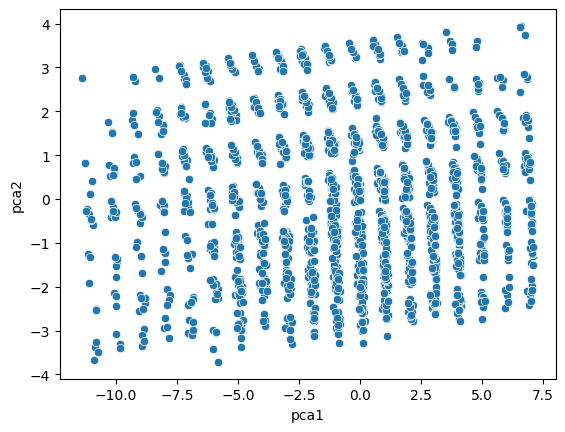

In [48]:
pca = PCA(2)
pca.fit(df_features_selected2)
X_PCA = pca.transform(df_features_selected2)
X_PCA.shape

df_pca = pd.DataFrame(X_PCA, columns = ['pca1', 'pca2'])

sns.scatterplot(data=df_pca, x="pca1", y="pca2")

In [49]:
df_features_selected2.head()

,ppagecat,ppeducat,ppgender,ppincimp,children_in_hh,qflag,glbstatus,s1,married,q24_met_online
0,4,4,2,7,0,1,1,2,0,1
1,2,4,2,11,0,1,1,1,1,0
3,2,3,1,11,0,1,1,2,0,1
6,4,4,1,17,0,1,1,2,0,0
7,5,4,1,6,0,1,1,1,1,0


In [51]:
X = df_features_selected2.iloc[:, [6,9]].values
X[:5]

array([[1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0]])

c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\olyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly du

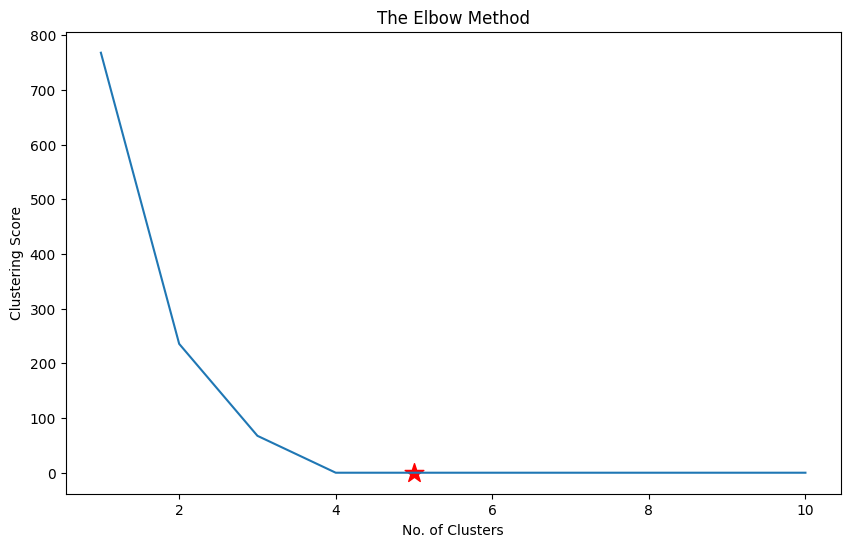

In [52]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [53]:
kmeans= KMeans(n_clusters = 4, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([3, 1, 3, ..., 3, 0, 0], shape=(2934,), dtype=int32)

In [55]:
df_features_selected2['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df_features_selected2['Cluster'].value_counts())
df_features_selected2

Number of data points in each cluster= 
 Cluster
0.0    1546
1.0     384
2.0     106
3.0      95
Name: count, dtype: int64


C:\Users\olyas\AppData\Local\Temp\ipykernel_7420\1393579432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_selected2['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )


,ppagecat,ppeducat,ppgender,ppincimp,children_in_hh,qflag,glbstatus,s1,married,q24_met_online,Cluster
0,4,4,2,7,0,1,1,2,0,1,3.0
1,2,4,2,11,0,1,1,1,1,0,1.0
3,2,3,1,11,0,1,1,2,0,1,1.0
6,4,4,1,17,0,1,1,2,0,0,1.0
7,5,4,1,6,0,1,1,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3995,3,4,1,17,0,1,0,1,1,0,NaN
3996,4,1,2,11,3,1,0,1,1,0,NaN
3999,4,3,2,18,0,1,1,2,0,1,NaN
4000,2,3,2,13,1,1,0,1,1,0,NaN


In [59]:
n_clusters = 10
cost = []
silh = []
for i in range(1,n_clusters):
    kmean = KMeans(i)
    kmean.fit(df_features_selected2)
    cost.append(kmean.inertia_)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
kneedle = KneeLocator(
  x=range(1, len(cost)+1),
  y=cost,
  curve="convex",
  direction="decreasing")
print(kneedle.elbow)
kneedle.plot_knee()